### PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, scale

In [ ]:
import statsmodels.api as sm

In [ ]:
USArrests = sm.datasets.get_rdataset("USArrests","datasets")

In [ ]:
datos = USArrests.data

In [38]:
datos.sample(5, random_state=1000)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Georgia,17.4,211,60,25.8
Ohio,7.3,120,75,21.4
Florida,15.4,335,80,31.9
Texas,12.7,201,80,25.5
New Jersey,7.4,159,89,18.8


In [ ]:
pca_pipe = make_pipeline(StandardScaler() , PCA())
pca_pipe.fit(datos)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
modelo_pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [ ]:
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns=['PC1', 'PC2','PC3','PC4'],
    index = datos.index
)

In [ ]:
proyecciones

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


In [ ]:
proyecciones = np.dot(modelo_pca.components_,scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index=['PC1', 'PC2','PC3','PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)

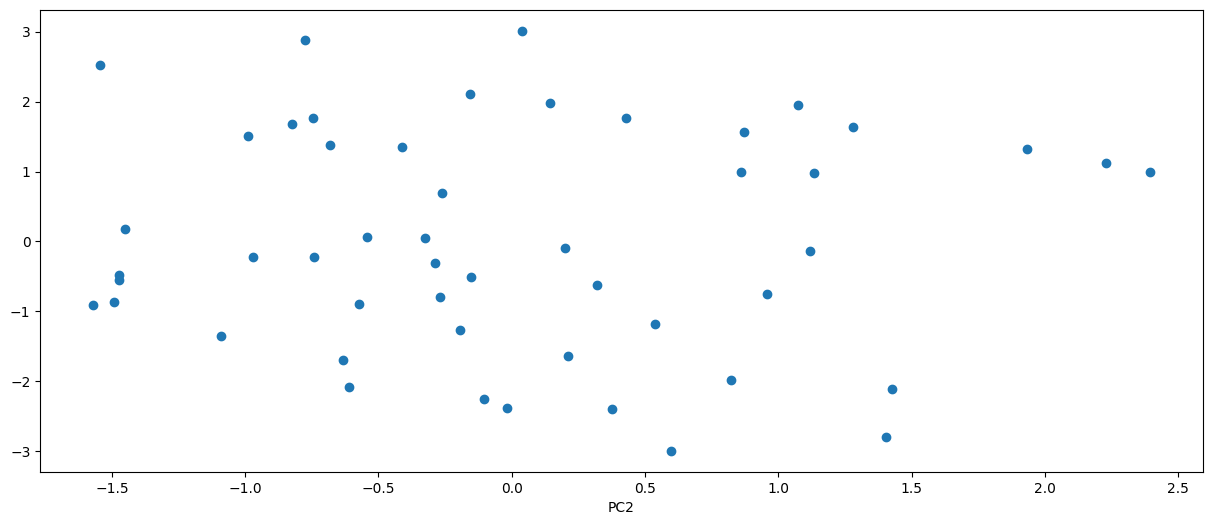

In [ ]:
plt.figure(figsize=(15,6))
proyecciones['val']=proyecciones.index
ax = proyecciones.set_index('PC2')['PC1'].plot(style='o')

In [ ]:
modelo_pca.components_[0]

array([0.53589947, 0.58318363, 0.27819087, 0.54343209])

### K-Means

In [39]:
from sklearn.datasets import make_blobs, make_moons

In [52]:
X1,y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=10)
X2,y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=10)
X3,y3 = make_moons(n_samples=1000, noise=0.05, random_state=10)

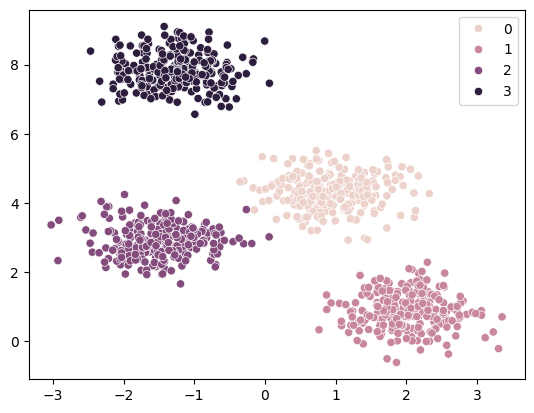

In [41]:
sns.scatterplot(x=X1[:,0], y = X1[:,1], hue= y1)
plt.show()

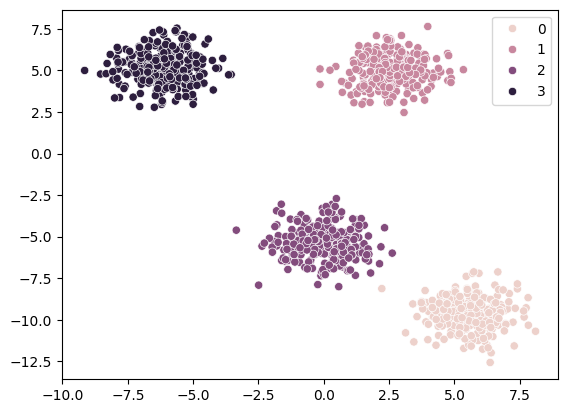

In [53]:
sns.scatterplot(x=X2[:,0], y = X2[:,1], hue= y2)
plt.show()

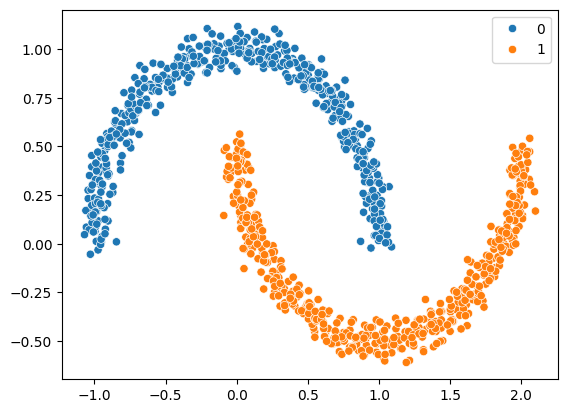

In [54]:
sns.scatterplot(x=X3[:,0], y = X3[:,1], hue= y3)
plt.show()